In [2]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## Consumption value no short

In [3]:
data=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/consumption_value_noshort.csv',delimiter=';')
data

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008861,0.00,0.0743,0.1221,0.0000,0.0000,0.0124,0.3181,0.1229,0.0000,0.1105,0.2396
2,0.008715,0.01,0.0787,0.1330,0.0000,0.0000,0.0156,0.3032,0.1314,0.0000,0.1091,0.2289
3,0.008583,0.02,0.0830,0.1436,0.0001,0.0001,0.0191,0.2885,0.1395,0.0000,0.1076,0.2183
4,0.008463,0.03,0.0874,0.1544,0.0002,0.0003,0.0222,0.2738,0.1478,0.0001,0.1061,0.2078
...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.014188,0.66,0.0000,0.0000,0.4218,0.2485,0.0000,0.0000,0.0000,0.3297,0.0000,0.0000
68,0.014874,0.67,0.0000,0.0000,0.4452,0.1766,0.0000,0.0000,0.0000,0.3782,0.0000,0.0000
69,0.015756,0.68,0.0000,0.0000,0.4685,0.1050,0.0000,0.0000,0.0000,0.4266,0.0000,0.0000
70,0.016806,0.69,0.0000,0.0000,0.4918,0.0331,0.0000,0.0000,0.0000,0.4750,0.0000,0.0000


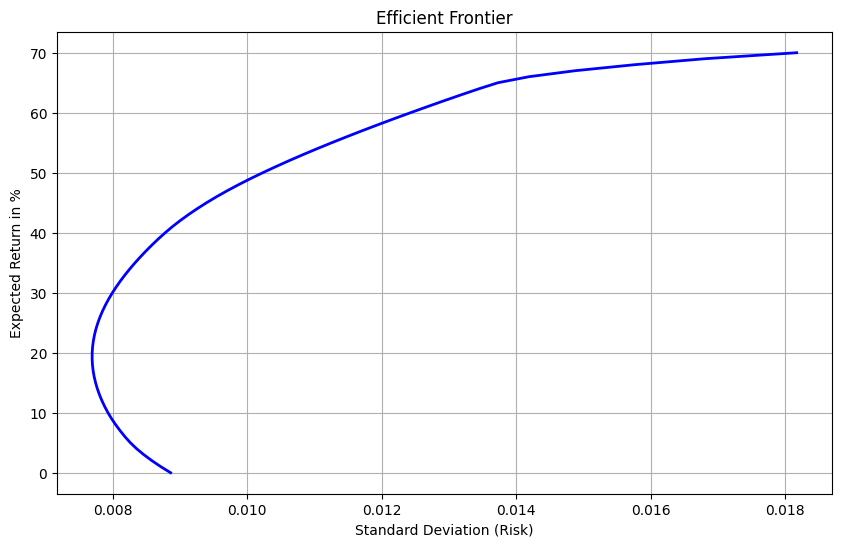

In [4]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


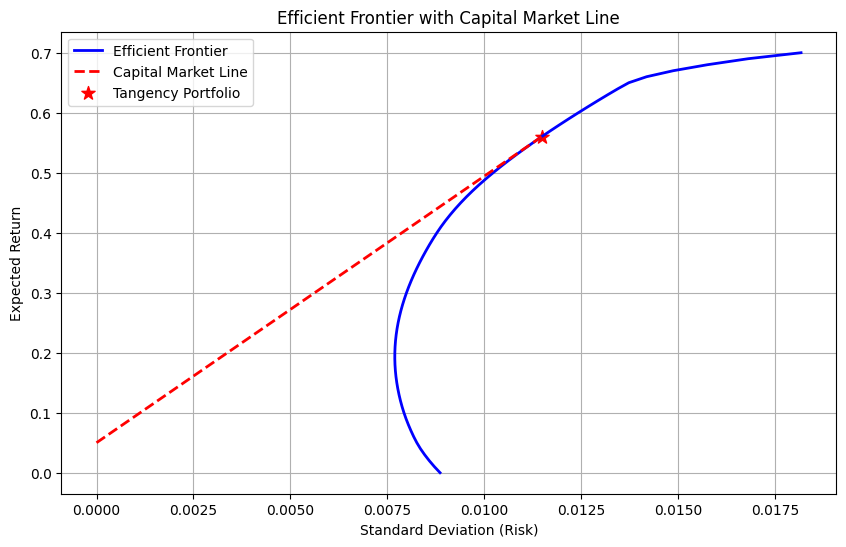

In [5]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data['SharpeRatio'] = (data['ERp'] - risk_free_rate) / (data['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data.loc[data['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
tangency_portfolio 

SDp             0.011480
ERp             0.560000
x1              0.043500
x2              0.102600
x3              0.308300
x4              0.277900
x5              0.011300
x6              0.000000
x7              0.048100
x8              0.208100
x9              0.000000
x10             0.000000
SharpeRatio    44.423557
Name: 57, dtype: float64

## Consumption value short


In [7]:
data_short=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/consumption_value_short.csv',delimiter=';')
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008654,0.00,0.0988,0.1823,-0.0187,-0.0166,0.0297,0.2713,0.1803,-0.0392,0.1115,0.2007
2,0.008562,0.01,0.0993,0.1833,-0.0142,-0.0122,0.0302,0.2642,0.1797,-0.0356,0.1096,0.1958
3,0.008475,0.02,0.0997,0.1842,-0.0098,-0.0077,0.0306,0.2571,0.1792,-0.0321,0.1077,0.1910
4,0.008391,0.03,0.1001,0.1852,-0.0053,-0.0032,0.0311,0.2500,0.1786,-0.0285,0.1059,0.1862
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.013915,0.76,0.1315,0.2560,0.3210,0.3224,0.0663,-0.2686,0.1381,0.2308,-0.0302,-0.1672
78,0.014086,0.77,0.1319,0.2570,0.3254,0.3268,0.0667,-0.2757,0.1376,0.2344,-0.0321,-0.1720
79,0.014258,0.78,0.1324,0.2579,0.3299,0.3313,0.0672,-0.2828,0.1370,0.2379,-0.0339,-0.1769
80,0.014431,0.79,0.1328,0.2589,0.3344,0.3358,0.0677,-0.2899,0.1364,0.2415,-0.0358,-0.1817


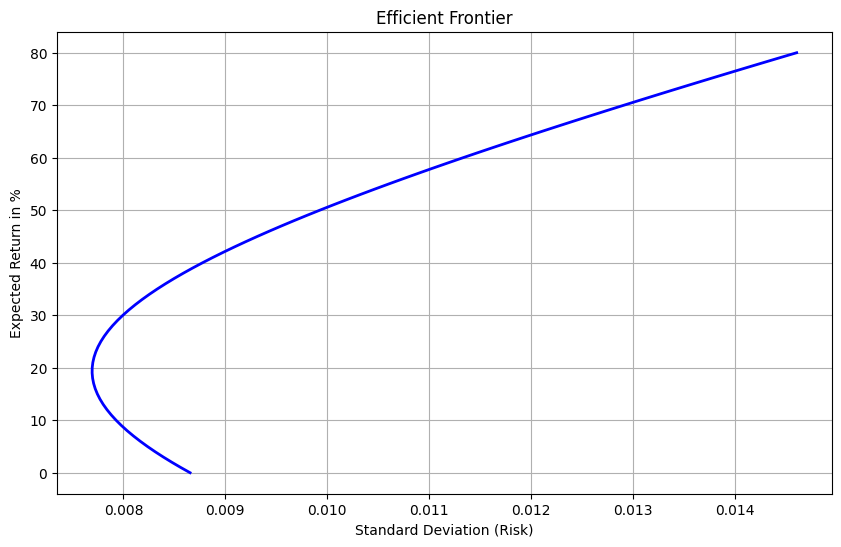

In [8]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


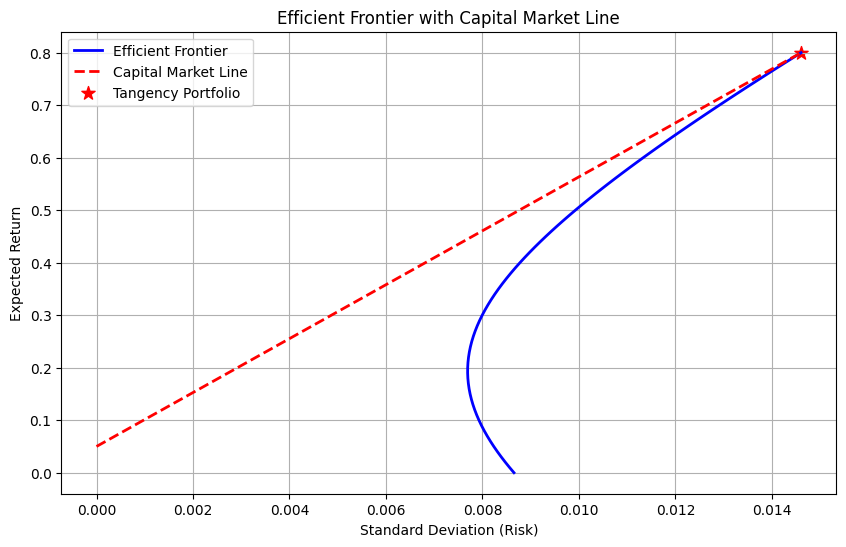

In [9]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data_short['SharpeRatio'] = (data_short['ERp'] - risk_free_rate) / (data_short['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data_short.loc[data_short['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
tangency_portfolio

SDp             0.014605
ERp             0.800000
x1              0.133200
x2              0.259900
x3              0.338800
x4              0.340200
x5              0.068200
x6             -0.297000
x7              0.135900
x8              0.245000
x9             -0.037700
x10            -0.186600
SharpeRatio    51.352756
Name: 81, dtype: float64

In [11]:
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,SharpeRatio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008654,0.00,0.0988,0.1823,-0.0187,-0.0166,0.0297,0.2713,0.1803,-0.0392,0.1115,0.2007,-5.777487
2,0.008562,0.01,0.0993,0.1833,-0.0142,-0.0122,0.0302,0.2642,0.1797,-0.0356,0.1096,0.1958,-4.671569
3,0.008475,0.02,0.0997,0.1842,-0.0098,-0.0077,0.0306,0.2571,0.1792,-0.0321,0.1077,0.1910,-3.540017
4,0.008391,0.03,0.1001,0.1852,-0.0053,-0.0032,0.0311,0.2500,0.1786,-0.0285,0.1059,0.1862,-2.383587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.013915,0.76,0.1315,0.2560,0.3210,0.3224,0.0663,-0.2686,0.1381,0.2308,-0.0302,-0.1672,51.022500
78,0.014086,0.77,0.1319,0.2570,0.3254,0.3268,0.0667,-0.2757,0.1376,0.2344,-0.0321,-0.1720,51.112811
79,0.014258,0.78,0.1324,0.2579,0.3299,0.3313,0.0672,-0.2828,0.1370,0.2379,-0.0339,-0.1769,51.197768
80,0.014431,0.79,0.1328,0.2589,0.3344,0.3358,0.0677,-0.2899,0.1364,0.2415,-0.0358,-0.1817,51.277659
